In [1]:
import pandas as pd
from tqdm import tqdm
import plotly.express as px
from dash import html, Dash, dcc, Input, Output
from typing import List
from jupyter_dash import JupyterDash
import plotly.graph_objects as go
import dash_bootstrap_components as dbc

In [2]:
df_original = pd.read_csv('../data/raw/curitiba_apartment_real_estate_data.csv')

In [3]:
df_original.head()

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,amenities,description,title,zipCode,lon,lat,street,neighborhood,poisList,yearlyIptu,monthlyCondoFee,price
0,77,90.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'GATED_COMMUNIT...","Apartamento com 3 dormitórios, sendo uma suíte...",Apartamento para venda tem 77 metros quadrados...,82540130,-49.249319,-25.394261,Rua Nossa Senhora de Nazaré,Boa Vista,"['BS:Estação Tubo Holanda', 'BS:Estação-tubo G...",700.0,400.0,595000
1,53,53.0,NaN,1,3,1.0,"['BARBECUE_GRILL', 'GATED_COMMUNITY', 'GYM', '...",Apartamento ensolarado e com linda vista pro P...,Apartamento ensolarado com 3 quartos ao lado d...,81320180,-49.326716,-25.474533,Rua Alfredo José Pinto,Fazendinha,"['BS:Rua José Gonçalves Júnior, 182', 'BS:Rua ...",NaN,392.0,185000
2,113,NaN,1.0,4,3,2.0,"['POOL', 'BARBECUE_GRILL', 'ELEVATOR', 'GATED_...","22º andar, face Norte, linda vista para a Serr...",Apt para venda no Cond. Botânica: 113 m² com 3...,80050470,-49.239110,-25.437162,Rua Coronel Pedro Scherer Sobrinho,Cristo Rei,"['BS:Estação Hospital Cajuru', 'BS:Linha Turis...",240.0,550.0,1220000
3,93,106.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Apartamento Residencial com 70m2 interno total...,Apartamento Mobiliado de Porteira Fechada incl...,81210310,-49.335318,-25.442254,Rua Jeremias Maciel Perretto,Campo Comprido,"['BS:Estação-tubo Mossunguê', 'BS:Mossunguê', ...",400.0,600.0,610000
4,66,NaN,1.0,2,3,1.0,"['BARBECUE_GRILL', 'GATED_COMMUNITY', 'PETS_AL...",Excelente apto garden com 66m² de área útil em...,Apartamento Novo Mundo 66m² útil,81050150,-49.304465,-25.492857,Rua Deputado Waldemiro Pedroso,Novo Mundo,"['BS:Ponto - 672 Formosa', 'BS:Ponto - 615 Ube...",NaN,NaN,269990


In [4]:
df_original.amenities = df_original.amenities.sort_values()

In [5]:
df_original.head()

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,amenities,description,title,zipCode,lon,lat,street,neighborhood,poisList,yearlyIptu,monthlyCondoFee,price
0,77,90.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'GATED_COMMUNIT...","Apartamento com 3 dormitórios, sendo uma suíte...",Apartamento para venda tem 77 metros quadrados...,82540130,-49.249319,-25.394261,Rua Nossa Senhora de Nazaré,Boa Vista,"['BS:Estação Tubo Holanda', 'BS:Estação-tubo G...",700.0,400.0,595000
1,53,53.0,NaN,1,3,1.0,"['BARBECUE_GRILL', 'GATED_COMMUNITY', 'GYM', '...",Apartamento ensolarado e com linda vista pro P...,Apartamento ensolarado com 3 quartos ao lado d...,81320180,-49.326716,-25.474533,Rua Alfredo José Pinto,Fazendinha,"['BS:Rua José Gonçalves Júnior, 182', 'BS:Rua ...",NaN,392.0,185000
2,113,NaN,1.0,4,3,2.0,"['POOL', 'BARBECUE_GRILL', 'ELEVATOR', 'GATED_...","22º andar, face Norte, linda vista para a Serr...",Apt para venda no Cond. Botânica: 113 m² com 3...,80050470,-49.239110,-25.437162,Rua Coronel Pedro Scherer Sobrinho,Cristo Rei,"['BS:Estação Hospital Cajuru', 'BS:Linha Turis...",240.0,550.0,1220000
3,93,106.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Apartamento Residencial com 70m2 interno total...,Apartamento Mobiliado de Porteira Fechada incl...,81210310,-49.335318,-25.442254,Rua Jeremias Maciel Perretto,Campo Comprido,"['BS:Estação-tubo Mossunguê', 'BS:Mossunguê', ...",400.0,600.0,610000
4,66,NaN,1.0,2,3,1.0,"['BARBECUE_GRILL', 'GATED_COMMUNITY', 'PETS_AL...",Excelente apto garden com 66m² de área útil em...,Apartamento Novo Mundo 66m² útil,81050150,-49.304465,-25.492857,Rua Deputado Waldemiro Pedroso,Novo Mundo,"['BS:Ponto - 672 Formosa', 'BS:Ponto - 615 Ube...",NaN,NaN,269990


In [6]:
df_original.shape

(18760, 18)

In [7]:
df_original.describe()

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,zipCode,lon,lat,yearlyIptu,monthlyCondoFee,price
count,18760.000000,18030.000000,17456.000000,18760.000000,18760.000000,18097.000000,1.876000e+04,13195.000000,13195.000000,1.441200e+04,1.516900e+04,1.876000e+04
mean,111.940938,204.335996,1.234934,2.385075,2.499200,1.583246,8.063613e+07,-49.281718,-25.442629,3.085847e+03,4.179377e+03,1.099262e+06
std,101.236947,2018.776854,1.049820,1.376859,0.880757,1.158257,6.462913e+05,0.056163,0.051163,1.540960e+05,1.608748e+05,1.840035e+06
min,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,8.001000e+07,-54.584012,-25.585247,0.000000e+00,0.000000e+00,8.500000e+02
25%,57.000000,69.000000,1.000000,1.000000,2.000000,1.000000,8.024002e+07,-49.291754,-25.456533,0.000000e+00,0.000000e+00,3.500000e+05
50%,89.000000,119.000000,1.000000,2.000000,3.000000,1.000000,8.053001e+07,-49.283922,-25.439361,0.000000e+00,3.800000e+02,6.500000e+05
75%,139.000000,199.000000,2.000000,3.000000,3.000000,2.000000,8.073032e+07,-49.264674,-25.431595,1.500000e+02,7.300000e+02,1.267950e+06
max,5000.000000,174932.000000,8.000000,11.000000,8.000000,40.000000,9.701049e+07,-49.180834,-20.434671,1.503353e+07,1.600000e+07,1.290331e+08


In [8]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18760 entries, 0 to 18759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   usableAreas      18760 non-null  int64  
 1   totalAreas       18030 non-null  float64
 2   suites           17456 non-null  float64
 3   bathrooms        18760 non-null  int64  
 4   bedrooms         18760 non-null  int64  
 5   parkingSpaces    18097 non-null  float64
 6   amenities        18760 non-null  object 
 7   description      18730 non-null  object 
 8   title            18633 non-null  object 
 9   zipCode          18760 non-null  int64  
 10  lon              13195 non-null  float64
 11  lat              13195 non-null  float64
 12  street           15689 non-null  object 
 13  neighborhood     18760 non-null  object 
 14  poisList         18760 non-null  object 
 15  yearlyIptu       14412 non-null  float64
 16  monthlyCondoFee  15169 non-null  float64
 17  price       

In [9]:
df_original.isnull().sum()

usableAreas           0
totalAreas          730
suites             1304
bathrooms             0
bedrooms              0
parkingSpaces       663
amenities             0
description          30
title               127
zipCode               0
lon                5565
lat                5565
street             3071
neighborhood          0
poisList              0
yearlyIptu         4348
monthlyCondoFee    3591
price                 0
dtype: int64

In [10]:
df_original = df_original.dropna().reset_index()
df_original

,index,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,amenities,description,title,zipCode,lon,lat,street,neighborhood,poisList,yearlyIptu,monthlyCondoFee,price
0,0,77,90.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'GATED_COMMUNIT...","Apartamento com 3 dormitórios, sendo uma suíte...",Apartamento para venda tem 77 metros quadrados...,82540130,-49.249319,-25.394261,Rua Nossa Senhora de Nazaré,Boa Vista,"['BS:Estação Tubo Holanda', 'BS:Estação-tubo G...",700.0,400.0,595000
1,3,93,106.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Apartamento Residencial com 70m2 interno total...,Apartamento Mobiliado de Porteira Fechada incl...,81210310,-49.335318,-25.442254,Rua Jeremias Maciel Perretto,Campo Comprido,"['BS:Estação-tubo Mossunguê', 'BS:Mossunguê', ...",400.0,600.0,610000
2,7,88,146.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'PLAYGROUND', '...","Apartamento impecável, direto com o proprietár...",Apartamento para venda possui 88 metros quadra...,82510000,-49.244942,-25.398545,Avenida Paraná,Bacacheri,"['BS:Estação Tubo Holanda', 'BS:Estação-tubo G...",1000.0,800.0,495000
3,16,78,130.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Excelente apartamento no 19º (Último andar) do...,Apartamento para venda com 78 metros quadrados...,81130020,-49.296779,-25.499005,Rua José Clementino Bettega,Capão Raso,"['BS:Estação-tubo José Bettega', 'BS:Estação S...",980.0,700.0,649900
4,23,94,168.0,1.0,2,3,2.0,"['FURNISHED', 'BARBECUE_GRILL', 'ELEVATOR', 'G...","Apartamento 3Q mobiliado, pronto para morar, n...",Apartamento para venda possui 94 metros quadra...,80620230,-49.284776,-25.459128,Rua Monsenhor Manoel Vicente,Água Verde,"['BS:Largo Ciro Silva', 'BS:Estação tubo Dom P...",100.0,530.0,680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,18728,126,240.0,2.0,2,2,2.0,"['POOL', 'BARBECUE_GRILL', 'ELEVATOR', 'BALCON...",CASA MILANO LANÇAMENTO<br>Empreendimento de al...,Apartamento - Bigorrilho - Curitiba/PR,80730030,-49.304550,-25.436016,Rua Martim Afonso,Bigorrilho,"['BS:Estação-tubo Gastão Câmara', 'BS:Estação-...",0.0,0.0,1300000
9171,18741,132,10.0,1.0,3,3,1.0,[],"Apartamento à Venda, 132m² por R$ 499.500. Big...","Apartamento à venda 3 Quartos, 1 Suite, 1 Vaga...",80730440,-49.291627,-25.431297,Avenida Cândido Hartmann,Mercês,"['BS:Estação-tubo Praça da Ucrânia', 'BS:Estaç...",140.0,375.0,499500
9172,18742,132,10.0,1.0,3,3,1.0,[],"Apartamento à Venda, 132m² por R$ 499.500. Big...","Apartamento à venda 3 Quartos, 1 Suite, 1 Vaga...",80730440,-49.291627,-25.431297,Avenida Cândido Hartmann,Mercês,"['BS:Estação-tubo Praça da Ucrânia', 'BS:Estaç...",140.0,375.0,499500
9173,18751,274,375.0,2.0,3,4,2.0,"['KITCHEN', 'BARBECUE_GRILL']","Apartamento Duplex à Venda, 274m² por R$ 1.100...",Apartamento Duplex à venda 4 quartos 2 suítes ...,80730030,-49.291830,-25.431390,Rua Martim Afonso,Bigorrilho,"['BS:Estação-tubo Praça da Ucrânia', 'BS:Estaç...",190.0,1644.0,1100000


In [11]:
df_original['amenities'] = df_original['amenities'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
df_original['monthIptu'] = df_original['yearlyIptu'] / 12
df_original

,index,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,amenities,description,title,zipCode,lon,lat,street,neighborhood,poisList,yearlyIptu,monthlyCondoFee,price,monthIptu
0,0,77,90.0,1.0,2,3,1.0,"[BARBECUE_GRILL, ELEVATOR, GATED_COMMUNITY, GY...","Apartamento com 3 dormitórios, sendo uma suíte...",Apartamento para venda tem 77 metros quadrados...,82540130,-49.249319,-25.394261,Rua Nossa Senhora de Nazaré,Boa Vista,"['BS:Estação Tubo Holanda', 'BS:Estação-tubo G...",700.0,400.0,595000,58.333333
1,3,93,106.0,1.0,2,3,2.0,"[POOL, FURNISHED, BARBECUE_GRILL, ELEVATOR, GA...",Apartamento Residencial com 70m2 interno total...,Apartamento Mobiliado de Porteira Fechada incl...,81210310,-49.335318,-25.442254,Rua Jeremias Maciel Perretto,Campo Comprido,"['BS:Estação-tubo Mossunguê', 'BS:Mossunguê', ...",400.0,600.0,610000,33.333333
2,7,88,146.0,1.0,2,3,1.0,"[BARBECUE_GRILL, ELEVATOR, PLAYGROUND, PARTY_H...","Apartamento impecável, direto com o proprietár...",Apartamento para venda possui 88 metros quadra...,82510000,-49.244942,-25.398545,Avenida Paraná,Bacacheri,"['BS:Estação Tubo Holanda', 'BS:Estação-tubo G...",1000.0,800.0,495000,83.333333
3,16,78,130.0,1.0,2,3,2.0,"[POOL, FURNISHED, BARBECUE_GRILL, ELEVATOR, GA...",Excelente apartamento no 19º (Último andar) do...,Apartamento para venda com 78 metros quadrados...,81130020,-49.296779,-25.499005,Rua José Clementino Bettega,Capão Raso,"['BS:Estação-tubo José Bettega', 'BS:Estação S...",980.0,700.0,649900,81.666667
4,23,94,168.0,1.0,2,3,2.0,"[FURNISHED, BARBECUE_GRILL, ELEVATOR, GATED_CO...","Apartamento 3Q mobiliado, pronto para morar, n...",Apartamento para venda possui 94 metros quadra...,80620230,-49.284776,-25.459128,Rua Monsenhor Manoel Vicente,Água Verde,"['BS:Largo Ciro Silva', 'BS:Estação tubo Dom P...",100.0,530.0,680000,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,18728,126,240.0,2.0,2,2,2.0,"[POOL, BARBECUE_GRILL, ELEVATOR, BALCONY, AIR_...",CASA MILANO LANÇAMENTO<br>Empreendimento de al...,Apartamento - Bigorrilho - Curitiba/PR,80730030,-49.304550,-25.436016,Rua Martim Afonso,Bigorrilho,"['BS:Estação-tubo Gastão Câmara', 'BS:Estação-...",0.0,0.0,1300000,0.000000
9171,18741,132,10.0,1.0,3,3,1.0,[],"Apartamento à Venda, 132m² por R$ 499.500. Big...","Apartamento à venda 3 Quartos, 1 Suite, 1 Vaga...",80730440,-49.291627,-25.431297,Avenida Cândido Hartmann,Mercês,"['BS:Estação-tubo Praça da Ucrânia', 'BS:Estaç...",140.0,375.0,499500,11.666667
9172,18742,132,10.0,1.0,3,3,1.0,[],"Apartamento à Venda, 132m² por R$ 499.500. Big...","Apartamento à venda 3 Quartos, 1 Suite, 1 Vaga...",80730440,-49.291627,-25.431297,Avenida Cândido Hartmann,Mercês,"['BS:Estação-tubo Praça da Ucrânia', 'BS:Estaç...",140.0,375.0,499500,11.666667
9173,18751,274,375.0,2.0,3,4,2.0,"[KITCHEN, BARBECUE_GRILL]","Apartamento Duplex à Venda, 274m² por R$ 1.100...",Apartamento Duplex à venda 4 quartos 2 suítes ...,80730030,-49.291830,-25.431390,Rua Martim Afonso,Bigorrilho,"['BS:Estação-tubo Praça da Ucrânia', 'BS:Estaç...",190.0,1644.0,1100000,15.833333


In [12]:
for indice, linha in tqdm(df_original.iterrows(), total=df_original.shape[0]):
    for valor in list(linha['amenities']):
        df_original.loc[indice, linha['amenities']] = 'Possui'

100%|██████████| 9175/9175 [06:36<00:00, 23.16it/s] 


In [13]:
df_original.fillna('Não possui', inplace=True)

In [14]:
df_original.to_csv('../data/processed/dados_completos.csv')

In [15]:
df_original.columns

Index(['index', 'usableAreas', 'totalAreas', 'suites', 'bathrooms', 'bedrooms',
       'parkingSpaces', 'amenities', 'description', 'title',
       ...
       'NEAR_ACCESS_ROADS', 'NEAR_PUBLIC_TRANSPORT',
       'ESSENTIAL_PUBLIC_SERVICES', 'SMALL_ROOM', 'YOUTH_GAME_ROOM', 'HOT_TUB',
       'PLAYGROUND_2', 'CARPET', 'GLASS_WALL', 'FULL_CABLING'],
      dtype='object', length=187)

In [3]:
df_dados_completos = pd.read_csv('../data/processed/dados_completos.csv')
df_dados_completos.head()

,Unnamed: 0,index,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,amenities,description,...,NEAR_ACCESS_ROADS,NEAR_PUBLIC_TRANSPORT,ESSENTIAL_PUBLIC_SERVICES,SMALL_ROOM,YOUTH_GAME_ROOM,HOT_TUB,PLAYGROUND_2,CARPET,GLASS_WALL,FULL_CABLING
0,0,0,77,90.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'GATED_COMMUNIT...","Apartamento com 3 dormitórios, sendo uma suíte...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
1,1,3,93,106.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Apartamento Residencial com 70m2 interno total...,...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
2,2,7,88,146.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'PLAYGROUND', '...","Apartamento impecável, direto com o proprietár...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
3,3,16,78,130.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Excelente apartamento no 19º (Último andar) do...,...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
4,4,23,94,168.0,1.0,2,3,2.0,"['FURNISHED', 'BARBECUE_GRILL', 'ELEVATOR', 'G...","Apartamento 3Q mobiliado, pronto para morar, n...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui


In [4]:
df_dados_completos.describe()

,Unnamed: 0,index,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,zipCode,lon,lat,yearlyIptu,monthlyCondoFee,price,monthIptu
count,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9.175000e+03,9175.000000,9175.000000,9.175000e+03,9.175000e+03,9.175000e+03,9175.000000
mean,4587.000000,8366.354986,115.495695,212.233569,1.197602,2.495477,2.601962,1.590300,8.065864e+07,-49.281690,-25.442907,5.431049e+02,3.295338e+03,1.063377e+06,45.258738
std,2648.738694,5231.414918,86.390073,1810.296426,1.052303,1.361095,0.845896,1.131189,6.502375e+05,0.025948,0.026528,1.242778e+04,1.704919e+05,1.437029e+06,1035.648322
min,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,8.001000e+07,-49.366608,-25.585247,0.000000e+00,0.000000e+00,8.500000e+02,0.000000
25%,2293.500000,3935.500000,62.000000,80.000000,1.000000,1.000000,2.000000,1.000000,8.024003e+07,-49.292321,-25.456864,0.000000e+00,0.000000e+00,3.699000e+05,0.000000
50%,4587.000000,7857.000000,92.000000,131.000000,1.000000,2.000000,3.000000,1.000000,8.053030e+07,-49.284177,-25.439585,0.000000e+00,3.500000e+02,6.686500e+05,0.000000
75%,6880.500000,12582.000000,142.000000,214.000000,2.000000,3.000000,3.000000,2.000000,8.073040e+07,-49.264175,-25.431371,1.515000e+02,7.000000e+02,1.250000e+06,12.625000
max,9174.000000,18758.000000,1501.000000,151746.000000,5.000000,8.000000,6.000000,19.000000,8.340845e+07,-49.180834,-25.349554,1.160000e+06,1.600000e+07,3.500000e+07,96666.666667


In [5]:
df_corr = df_dados_completos.corr()
df_corr

,Unnamed: 0,index,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,zipCode,lon,lat,yearlyIptu,monthlyCondoFee,price,monthIptu
Unnamed: 0,1.000000,0.995250,0.089446,0.006887,0.138019,0.080065,-0.071708,0.061154,-0.236246,-0.007867,0.019677,0.011463,0.006043,0.115905,0.011463
index,0.995250,1.000000,0.083618,0.006544,0.135038,0.075724,-0.072986,0.059656,-0.230564,-0.014551,0.017696,0.012606,0.004860,0.111123,0.012606
usableAreas,0.089446,0.083618,1.000000,0.061207,0.716457,0.764714,0.642953,0.711993,-0.147489,-0.109186,0.125438,0.033298,0.091576,0.754170,0.033298
totalAreas,0.006887,0.006544,0.061207,1.000000,0.049880,0.054744,0.052368,0.061288,-0.010156,-0.010107,-0.012079,0.001813,0.006980,0.051681,0.001813
suites,0.138019,0.135038,0.716457,0.049880,1.000000,0.826552,0.550033,0.691170,-0.124591,-0.112839,0.137448,0.037890,0.031956,0.629602,0.037890
bathrooms,0.080065,0.075724,0.764714,0.054744,0.826552,1.000000,0.667126,0.689390,-0.159324,-0.102979,0.162680,0.031000,0.037885,0.591857,0.031000
bedrooms,-0.071708,-0.072986,0.642953,0.052368,0.550033,0.667126,1.000000,0.567738,-0.021306,-0.099079,0.079205,0.024601,0.018665,0.390637,0.024601
parkingSpaces,0.061154,0.059656,0.711993,0.061288,0.691170,0.689390,0.567738,1.000000,-0.060302,-0.143575,0.093307,0.015734,0.039285,0.621328,0.015734
zipCode,-0.236246,-0.230564,-0.147489,-0.010156,-0.124591,-0.159324,-0.021306,-0.060302,1.000000,-0.002809,0.024552,-0.015998,0.007258,-0.091306,-0.015998
lon,-0.007867,-0.014551,-0.109186,-0.010107,-0.112839,-0.102979,-0.099079,-0.143575,-0.002809,1.000000,0.420333,0.002029,-0.025324,-0.129055,0.002029


In [6]:
for chave, valor in enumerate(df_dados_completos.columns):
    print(chave, valor)

0 Unnamed: 0
1 index
2 usableAreas
3 totalAreas
4 suites
5 bathrooms
6 bedrooms
7 parkingSpaces
8 amenities
9 description
10 title
11 zipCode
12 lon
13 lat
14 street
15 neighborhood
16 poisList
17 yearlyIptu
18 monthlyCondoFee
19 price
20 monthIptu
21 BARBECUE_GRILL
22 ELEVATOR
23 GATED_COMMUNITY
24 GYM
25 PETS_ALLOWED
26 GOURMET_BALCONY
27 PARTY_HALL
28 BICYCLES_PLACE
29 AMERICAN_KITCHEN
30 LAUNDRY
31 DISABLED_ACCESS
32 ELECTRONIC_GATE
33 POOL
34 FURNISHED
35 GOURMET_SPACE
36 AIR_CONDITIONING
37 GARDEN
38 PLAYGROUND
39 SPORTS_COURT
40 CONCIERGE_24H
41 GAMES_ROOM
42 CLOSET
43 CINEMA
44 SAUNA
45 SPA
46 COWORKING
47 PLANNED_FURNITURE
48 SECURITY_CABIN
49 SECURITY_CAMERA
50 EMPLOYEE_DEPENDENCY
51 TENNIS_COURT
52 RECREATION_AREA
53 FOOTBALL_FIELD
54 PET_SPACE
55 ENTRANCE_HALL
56 FIREPLACE
57 SQUASH
58 BARBECUE_BALCONY
59 PLATED_GAS
60 LARGE_WINDOW
61 DINNER_ROOM
62 INTEGRATED_ENVIRONMENTS
63 BLINDEX_BOX
64 LAMINATED_FLOOR
65 LIBRARY
66 CHILDREN_CARE
67 DRESS_ROOM
68 Unnamed: 68
69 ALARM_SY

In [7]:
df_dados_completos.columns[21:]

Index(['BARBECUE_GRILL', 'ELEVATOR', 'GATED_COMMUNITY', 'GYM', 'PETS_ALLOWED',
       'GOURMET_BALCONY', 'PARTY_HALL', 'BICYCLES_PLACE', 'AMERICAN_KITCHEN',
       'LAUNDRY',
       ...
       'NEAR_ACCESS_ROADS', 'NEAR_PUBLIC_TRANSPORT',
       'ESSENTIAL_PUBLIC_SERVICES', 'SMALL_ROOM', 'YOUTH_GAME_ROOM', 'HOT_TUB',
       'PLAYGROUND_2', 'CARPET', 'GLASS_WALL', 'FULL_CABLING'],
      dtype='object', length=167)

In [69]:
fig = px.box(df_dados_completos, x='BARBECUE_GRILL', y='price', )
fig.show()

In [11]:
def total_agrupado(nome_coluna_df: List, nome_coluna_saida: str, facilidades: str = None,
                   df_dados_completos=df_dados_completos):
    if facilidades is not None:
        df_dados_completos = df_dados_completos.query(f'{coluna} == "Possui" ')
    dados_completos = df_dados_completos.groupby(nome_coluna_df).size().reset_index(name=nome_coluna_saida)
    return dados_completos.sort_values(by=nome_coluna_saida, ascending=True)

In [7]:
def media_apartamento(nome_coluna_df: List, nome_coluna_saida: str, facilidades: str = None,
                   df_dados_completos=df_dados_completos):
    if facilidades is not None:
        df_dados_completos = df_dados_completos.query(f'{coluna} == "Possui" ')
    print(nome_coluna_saida)
    dados_completos = df_dados_completos.groupby(nome_coluna_df)['price'].median().reset_index(name=nome_coluna_saida)
    return dados_completos.sort_values(by=nome_coluna_saida, ascending=True)
    return dados_completos

In [8]:
df_valor_apartamento_bairro = media_apartamento(nome_coluna_df=['neighborhood'], nome_coluna_saida='MEDIA_POR_BAIRRO')
df_valor_apartamento_bairro

MEDIA_POR_BAIRRO


,neighborhood,MEDIA_POR_BAIRRO
20,Campo de Santana,125000.0
61,Tatuquara,139000.0
30,Ganchinho,140000.0
16,Cachoeira,145000.0
6,Augusta,159999.0
...,...,...
42,Mossunguê,1240000.0
10,Batel,1250000.0
1,Ahú,1267500.0
34,Hugo Lange,1280000.0


In [9]:
coluna = 'BARBECUE_GRILL'

df_dados_completos.query(f'{coluna} == "Possui" ')

,Unnamed: 0,index,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,amenities,description,...,NEAR_ACCESS_ROADS,NEAR_PUBLIC_TRANSPORT,ESSENTIAL_PUBLIC_SERVICES,SMALL_ROOM,YOUTH_GAME_ROOM,HOT_TUB,PLAYGROUND_2,CARPET,GLASS_WALL,FULL_CABLING
0,0,0,77,90.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'GATED_COMMUNIT...","Apartamento com 3 dormitórios, sendo uma suíte...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
1,1,3,93,106.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Apartamento Residencial com 70m2 interno total...,...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
2,2,7,88,146.0,1.0,2,3,1.0,"['BARBECUE_GRILL', 'ELEVATOR', 'PLAYGROUND', '...","Apartamento impecável, direto com o proprietár...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
3,3,16,78,130.0,1.0,2,3,2.0,"['POOL', 'FURNISHED', 'BARBECUE_GRILL', 'ELEVA...",Excelente apartamento no 19º (Último andar) do...,...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
4,4,23,94,168.0,1.0,2,3,2.0,"['FURNISHED', 'BARBECUE_GRILL', 'ELEVATOR', 'G...","Apartamento 3Q mobiliado, pronto para morar, n...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9165,9165,18635,10,10.0,1.0,6,4,5.0,"['BARBECUE_GRILL', 'BALCONY', 'AIR_CONDITIONIN...","Apartamento à Venda, 1m² por R$ 7.872.000. Big...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
9166,9166,18655,130,216.0,1.0,2,3,2.0,"['BARBECUE_GRILL', 'BALCONY', 'AIR_CONDITIONIN...","Apartamento à Venda, 130m² por R$ 730.000. Big...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
9168,9168,18706,135,184.0,1.0,3,3,1.0,"['BARBECUE_GRILL', 'GATED_COMMUNITY', 'GOURMET...","Amplo apartamento no coração do bigorrilho, a ...",...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui
9170,9170,18728,126,240.0,2.0,2,2,2.0,"['POOL', 'BARBECUE_GRILL', 'ELEVATOR', 'BALCON...",CASA MILANO LANÇAMENTO<br>Empreendimento de al...,...,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui,Não possui


<p>Total apartamentos por vizinhança</p>

In [12]:
df_total_apartamento_bairo = total_agrupado(['neighborhood'], 'TOTAL_APARTAMENTO_POR_BAIRRO', facilidades='POOL')
df_total_apartamento_bairo

,neighborhood,TOTAL_APARTAMENTO_POR_BAIRRO
34,Jardim Social,1
5,Augusta,1
52,São Lourenço,1
0,Abranches,2
8,Barreirinha,2
...,...,...
14,Cabral,148
9,Batel,319
10,Bigorrilho,404
23,Centro,457


In [14]:
df_dados_completos_corr = df_dados_completos.corr()
df_dados_completos_corr

,Unnamed: 0,index,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,zipCode,lon,lat,yearlyIptu,monthlyCondoFee,price,monthIptu
Unnamed: 0,1.000000,0.995250,0.089446,0.006887,0.138019,0.080065,-0.071708,0.061154,-0.236246,-0.007867,0.019677,0.011463,0.006043,0.115905,0.011463
index,0.995250,1.000000,0.083618,0.006544,0.135038,0.075724,-0.072986,0.059656,-0.230564,-0.014551,0.017696,0.012606,0.004860,0.111123,0.012606
usableAreas,0.089446,0.083618,1.000000,0.061207,0.716457,0.764714,0.642953,0.711993,-0.147489,-0.109186,0.125438,0.033298,0.091576,0.754170,0.033298
totalAreas,0.006887,0.006544,0.061207,1.000000,0.049880,0.054744,0.052368,0.061288,-0.010156,-0.010107,-0.012079,0.001813,0.006980,0.051681,0.001813
suites,0.138019,0.135038,0.716457,0.049880,1.000000,0.826552,0.550033,0.691170,-0.124591,-0.112839,0.137448,0.037890,0.031956,0.629602,0.037890
bathrooms,0.080065,0.075724,0.764714,0.054744,0.826552,1.000000,0.667126,0.689390,-0.159324,-0.102979,0.162680,0.031000,0.037885,0.591857,0.031000
bedrooms,-0.071708,-0.072986,0.642953,0.052368,0.550033,0.667126,1.000000,0.567738,-0.021306,-0.099079,0.079205,0.024601,0.018665,0.390637,0.024601
parkingSpaces,0.061154,0.059656,0.711993,0.061288,0.691170,0.689390,0.567738,1.000000,-0.060302,-0.143575,0.093307,0.015734,0.039285,0.621328,0.015734
zipCode,-0.236246,-0.230564,-0.147489,-0.010156,-0.124591,-0.159324,-0.021306,-0.060302,1.000000,-0.002809,0.024552,-0.015998,0.007258,-0.091306,-0.015998
lon,-0.007867,-0.014551,-0.109186,-0.010107,-0.112839,-0.102979,-0.099079,-0.143575,-0.002809,1.000000,0.420333,0.002029,-0.025324,-0.129055,0.002029


In [17]:
hmf = px.imshow(df_dados_completos_corr, template="seaborn", text_auto=True)
hmf.update_layout(xaxis_rangeslider_visible=False,
                      autosize=False,
                      width=1150,
                      height=700,
                      title={
                            'text': "Correlation of Numerical Variables"}
                    )
hmf.update_traces(texttemplate='%{z:.2f}')
hmf.show()

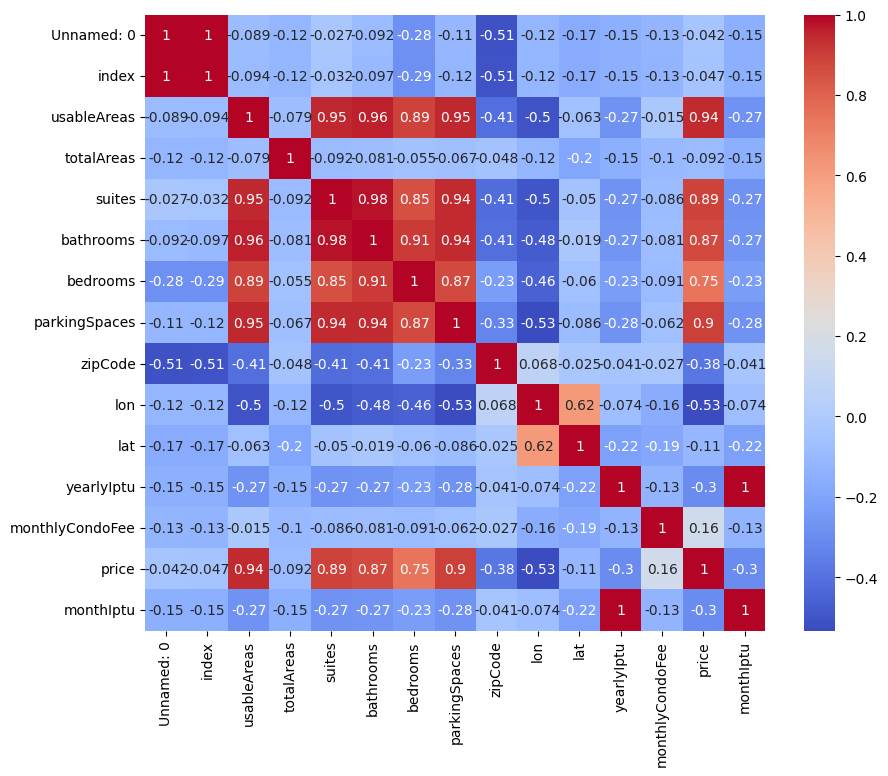

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_dados_completos_corr.corr(), cmap='coolwarm', annot=True)
plt.show()

In [66]:
reg_lin = px.histogram(df_dados_completos, x='suites')
reg_lin.show()

In [8]:
colunas_facilidades = df_dados_completos.columns[21:]
(colunas_facilidades[1])

'ELEVATOR'

In [17]:
app = JupyterDash()

app.layout = html.Div(
    [
        dbc.Select(colunas_facilidades, id='id_select_facilites'),
        html.Br(),
        html.Br(),
        dcc.Graph(
            style={
                "Height": "500px",
                "overflow": "scroll",
                'color': 'red',
                'margin-top': '100px'
            },
            id='id_grafico_barras_total_apartamento'
        )
    ]
)


@app.callback(
    Output('id_grafico_barras_total_apartamento', 'figure'),
    Input('id_select_facilites', 'value')
)
def gerar_grafico_total_apartamentos(value):

    df_total_apartamento_bairo = total_agrupado(['neighborhood'], 'TOTAL_APARTAMENTO_POR_BAIRRO', facilidades=value)

    fig = go.Figure(
        go.Bar(
            textsrc='a',
            y=df_total_apartamento_bairo['neighborhood'],
            x=df_total_apartamento_bairo['TOTAL_APARTAMENTO_POR_BAIRRO'],
            marker={'color': 'red'},
            text=df_total_apartamento_bairo['TOTAL_APARTAMENTO_POR_BAIRRO'],
            orientation='h'
        ),
    )


    fig.update_layout(bargap=0.9, height=2800, title='Total de Apartamentos')
    fig.update_traces(width=0.5)
    return fig

app.run_server(debug=True, mode='inline')